In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2284 non-null   object 
 1   co2     2225 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


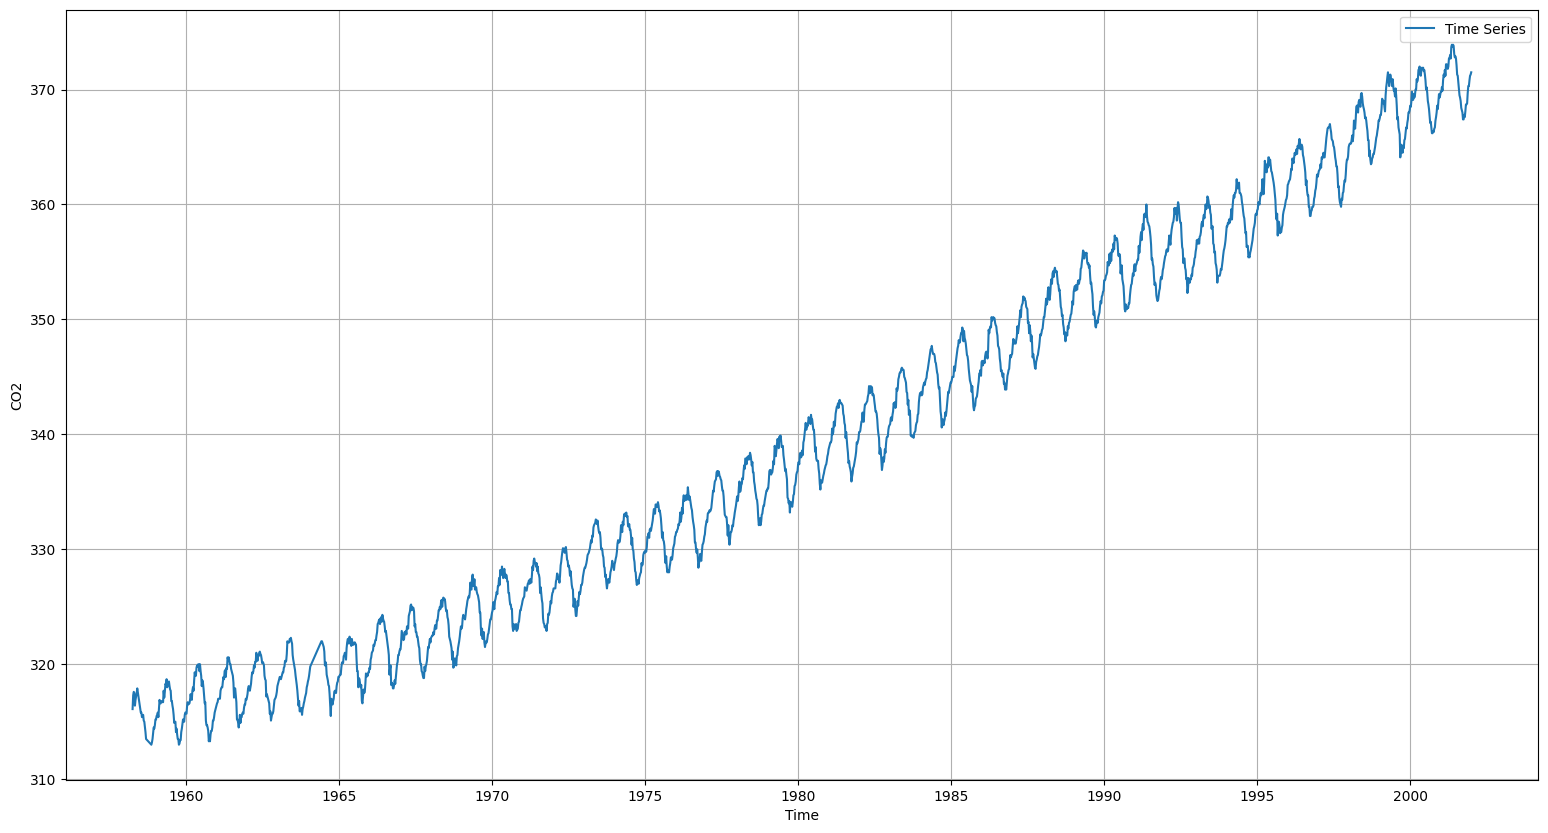

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2284 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


In [ ]:
data = pd.read_csv('co2.csv')
data.info()

data['time'] = pd.to_datetime(data['time'])
plt.figure(figsize=(19, 10))
sns.lineplot(x="time", y="co2", data=data, label="Time Series")
plt.xlabel("Time")
plt.ylabel("CO2")
plt.grid(True)
plt.show()

data.info()

In [ ]:
print(data["co2"].isnull().sum())

data["co2"] = data["co2"].interpolate()

print(data["co2"].isnull().sum())

59
0


In [ ]:
def create_csv_data(data, window_size = 6):
  for i in range(1, window_size):
    data[f"co2_{i}"] = data["co2"].shift(-i)

  return data

data = create_csv_data(data)
data["target"] = data["co2"].shift(-6)
data = data.dropna(axis = 0)  # Bỏ các hàng có các ký tự NaN
time = data["time"]
data = data.drop(columns=["time"])  # Bỏ cột time
print(data)

        co2  co2_1  co2_2  co2_3  co2_4   co2_5  target
0     316.1  317.3  317.6  317.5  316.4  316.90  317.20
1     317.3  317.6  317.5  316.4  316.9  317.20  317.50
2     317.6  317.5  316.4  316.9  317.2  317.50  317.90
3     317.5  316.4  316.9  317.2  317.5  317.90  317.55
4     316.4  316.9  317.2  317.5  317.9  317.55  317.20
...     ...    ...    ...    ...    ...     ...     ...
2273  368.1  368.7  368.7  368.8  369.7  370.30  370.30
2274  368.7  368.7  368.8  369.7  370.3  370.30  370.80
2275  368.7  368.8  369.7  370.3  370.3  370.80  371.20
2276  368.8  369.7  370.3  370.3  370.8  371.20  371.30
2277  369.7  370.3  370.3  370.8  371.2  371.30  371.50

[2278 rows x 7 columns]


In [ ]:
x = data.drop(columns = ["target"])
y = data["target"]

x_train = x[:int(0.9 * len(x))]
x_test = x[int(0.9 * len(x)):]
y_train = y[:int(0.9 * len(y))]
y_test = y[int(0.9 * len(y)):]

print(x_train)
print(y_test)

        co2  co2_1  co2_2  co2_3  co2_4   co2_5
0     316.1  317.3  317.6  317.5  316.4  316.90
1     317.3  317.6  317.5  316.4  316.9  317.20
2     317.6  317.5  316.4  316.9  317.2  317.50
3     317.5  316.4  316.9  317.2  317.5  317.90
4     316.4  316.9  317.2  317.5  317.9  317.55
...     ...    ...    ...    ...    ...     ...
2045  365.7  365.6  365.5  365.1  365.0  364.60
2046  365.6  365.5  365.1  365.0  364.6  364.10
2047  365.5  365.1  365.0  364.6  364.1  363.80
2048  365.1  365.0  364.6  364.1  363.8  363.30
2049  365.0  364.6  364.1  363.8  363.3  363.30

[2050 rows x 6 columns]
2050    361.5
2051    361.6
2052    360.6
2053    360.2
2054    360.0
        ...  
2273    370.3
2274    370.8
2275    371.2
2276    371.3
2277    371.5
Name: target, Length: 228, dtype: float64


## **Trong cách split dữ liệu của time series data, phải chia dữ liệu 1 cách liên tiếp chứ k sử dụng hàm train_test_split để đảm bảo tính liên tục của dữ liệu**

In [ ]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [ ]:
print("LinearReg:")
print()
print(mean_absolute_error(y_test, y_pred1))
print(mean_squared_error(y_test, y_pred1))
print(r2_score(y_test, y_pred1))

print()

print("ForestReg:")
print()
print(mean_absolute_error(y_test, y_pred2))
print(mean_squared_error(y_test, y_pred2))
print(r2_score(y_test, y_pred2))

LinearReg:

0.361053458277506
0.21635508924036703
0.9766397487788706

ForestReg:

2.604881578947544
11.177541258773138
-0.20685939376905793


In [ ]:
print(len(x))
print(len(y))
print(len(data))

2278
2278
2278


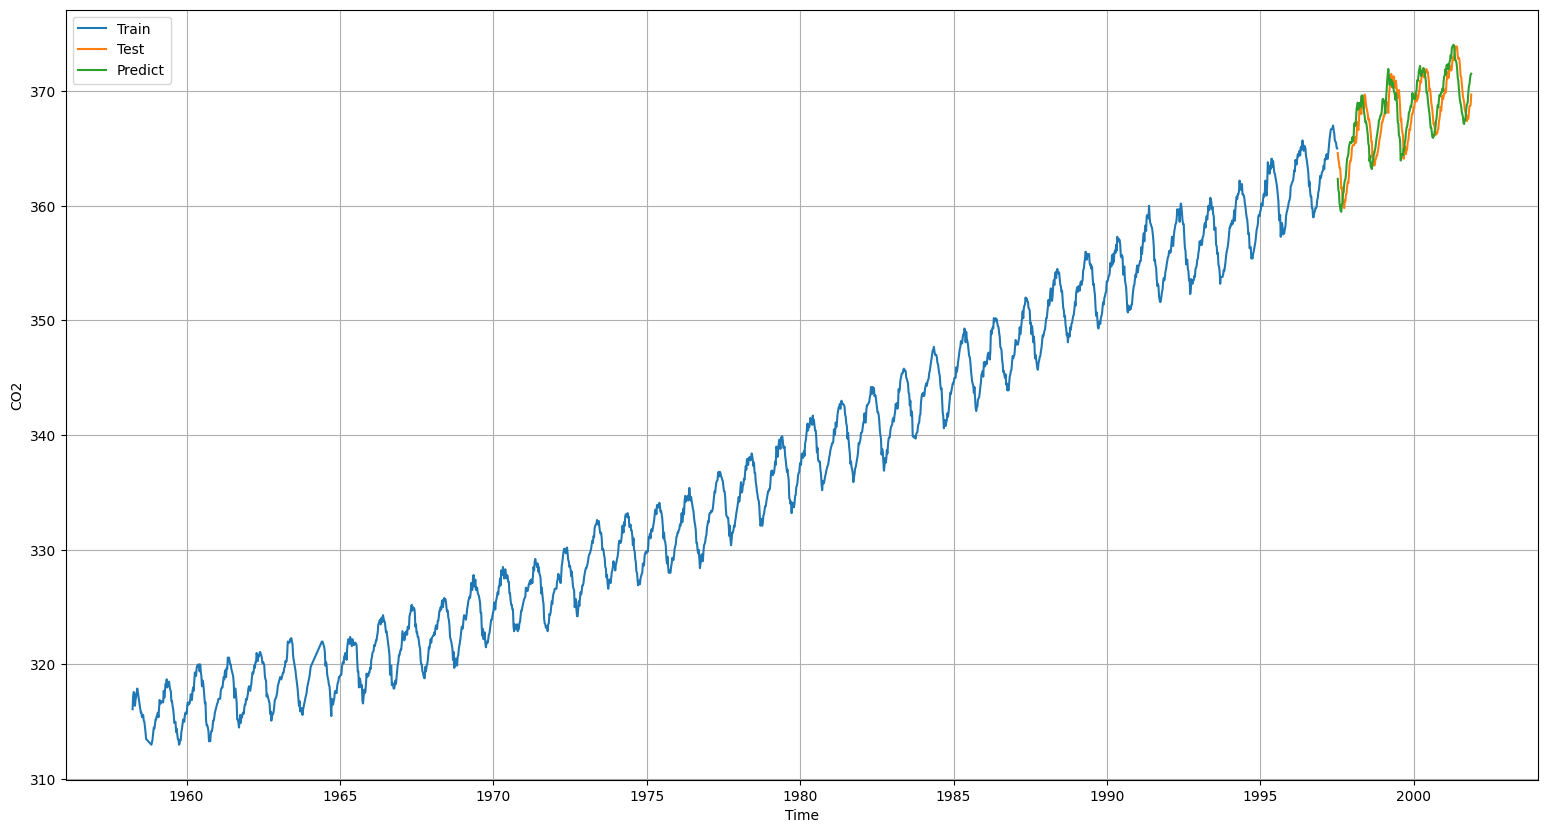

In [ ]:
plt.figure(figsize=(19, 10))
sns.lineplot(x=time[:int(0.9 * len(x))], y="co2", data=data[:int(0.9 * len(x))], label="Train")
sns.lineplot(x=time[int(0.9 * len(x)):], y="co2", data=data[int(0.9 * len(x)):], label="Test")
sns.lineplot(x=time[int(0.9 * len(x)):], y=y_pred1, label="Predict")
plt.xlabel("Time")
plt.ylabel("CO2")
plt.grid(True)
plt.show()

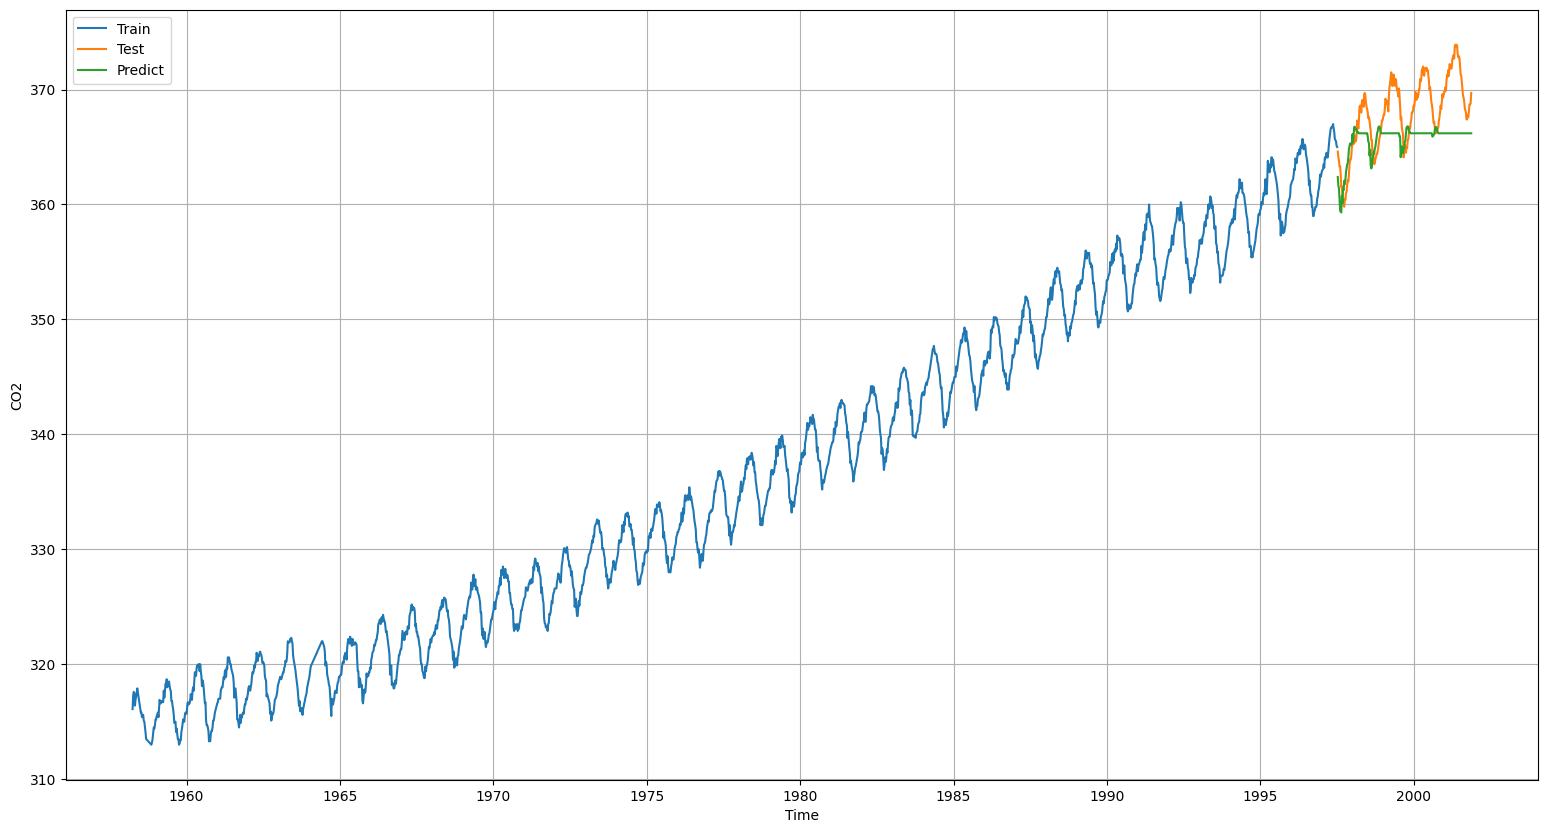

In [ ]:
plt.figure(figsize=(19, 10))
sns.lineplot(x=time[:int(0.9 * len(x))], y="co2", data=data[:int(0.9 * len(x))], label="Train")
sns.lineplot(x=time[int(0.9 * len(x)):], y="co2", data=data[int(0.9 * len(x)):], label="Test")
sns.lineplot(x=time[int(0.9 * len(x)):], y=y_pred2, label="Predict")
plt.xlabel("Time")
plt.ylabel("CO2")
plt.grid(True)
plt.show()